In [1]:
# Basic
import os
import sys
import random

import numpy as np
import pandas as pd
from scipy.misc import imrotate

from skimage.io import imread, imshow, imread_collection, concatenate_images
%matplotlib inline

In [2]:
img_path = '../data/train/5bb8508ff8ec8683fc6a8aa6bd470f6feb3af4eccdca07f51a1ebc9dad67cfb8'
img_id = '5bb8508ff8ec8683fc6a8aa6bd470f6feb3af4eccdca07f51a1ebc9dad67cfb8'

In [3]:
os.listdir(img_path+'/images')

['5bb8508ff8ec8683fc6a8aa6bd470f6feb3af4eccdca07f51a1ebc9dad67cfb8.png']

In [4]:
img = imread(img_path+'/images/'+img_id+'.png')[:,:,:3]
print img.min(), img.max()
img = (img.astype(np.float32) - 127.5)/128.
print img.shape

10 216
(520, 696, 3)


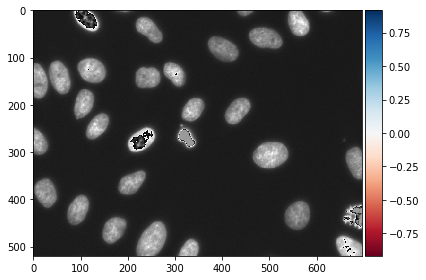

In [5]:
imshow(img)
### After doing some normalization, it looks much better.

(520, 696)


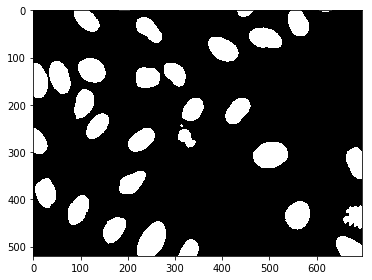

In [6]:
mask = np.zeros(img.shape[:2])
for f in os.listdir(img_path+'/masks'):
    tmp = imread(img_path+'/masks/'+f)
    mask = np.maximum(mask, tmp)
print mask.shape
mask = mask/mask.max()
imshow(mask)

In [7]:
min_height = 1E8
min_width = 1E8
path = '../data/train'
for f in os.listdir(path):
    i = imread(path + '/' + f + '/images/' + f + '.png')
    min_height = min(i.shape[0], min_height)
    min_width = min(i.shape[1], min_width)
    if min_height != 256:
        print f
print min_height
print min_width

5bb8508ff8ec8683fc6a8aa6bd470f6feb3af4eccdca07f51a1ebc9dad67cfb8
256
256


(696, 520, 3) (520, 696, 3)


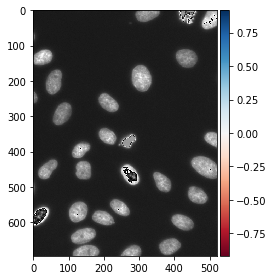

In [8]:
img_rotate = np.rot90(img)
imshow(img_rotate)
print img_rotate.shape, img.shape

(696, 520, 3)


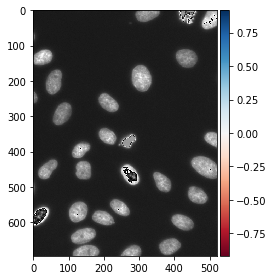

In [9]:
img = np.rot90(img)
imshow(img)
print img.shape

(696, 520, 3)


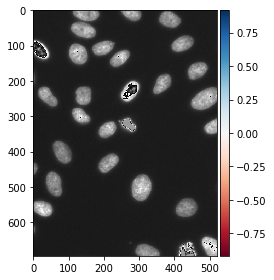

In [10]:
img = np.flipud(img)
imshow(img)
print img.shape

In [11]:
A = img.reshape((696*520*3,))
print A

[-0.89453125 -0.89453125 -0.89453125 ..., -0.25390625 -0.25390625
 -0.25390625]


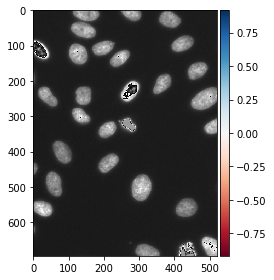

In [12]:
img_convert = A.reshape((696, 520, 3))
imshow(img_convert)

In [13]:
img_convert == img

array([[[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ..., 
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ..., 
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ..., 
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       ..., 
       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ..., 
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ..., 
        [ True,  True,  True],
        [ True,  True,  True],
        [ 